## Feature scaling

For many machine learning models, it is important that the quantitative data have the same scale. This is true for:

* algorithms that calculate distance (e.g. k-nearest neighbors or k-means);
* and models that optimize weights using gradient descent and regularization (in particular, linear or logistic regression).

In addition, in some cases, we may want to transform the data so that it becomes more normally distributed. This can be important for:

* conducting statistical tests;
* turning a nonlinear relationship into a linear one (which is important, in  particular, for calculating linear correlation or using a linear model);
* stabilizing variance, for example, when detecting heteroscedasticity in the residuals of a linear regression model.

Certainly, here are the main feature scaling methods in machine learning:

1. Normalization:
   - Min-Max Scaling (Linear Normalization): $x' = \frac{x - \min(x)}{\max(x) - \min(x)}$

2. Standardization:
   - Z-Normalization (Standardization): $x' = \frac{x - \mu}{\sigma}$, where $\mu$ is the mean and $\sigma$ is the standard deviation.

3. Logarithmic Transformation:
   - $x' = \log(x + 1)$

4. Quantile Transformation:
   - Transforms the features to follow a more Gaussian-like distribution.

5. Robust Scaling:
   - Uses the median and interquartile range instead of the mean and standard deviation to reduce the impact of outliers.

The choice of scaling method depends on the characteristics of the data and the requirements of the specific machine learning task.

### Data Loading

In [ ]:
# disabling the output of warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# connecting libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# connecting google drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# the dataset is taken here: https://www.kaggle.com/uciml/pima-indians-diabetes-database
# uploading data
dataset = pd.read_csv('/content/drive/MyDrive/курсы/DM/Модуль 2 Предварительная обработка данных/lab/материалы для лабораторной/diabetes.csv', sep=',')

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Normalization

   - Min-Max Scaling (Linear Normalization): $x' = \frac{x - \min(x)}{\max(x) - \min(x)}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler().fit(dataset)
dataset_mm_scaled = mm_scaler.transform(dataset)

ds_mm_scaled = pd.DataFrame(dataset_mm_scaled, columns = dataset.columns)
ds_mm_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Standardization

   - Z-Normalization (Standardization): $x' = \frac{x - \mu}{\sigma}$, where $\mu$ is the mean and $\sigma$ is the standard deviation.


In [ ]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler().fit(dataset)
dataset_scaled = st_scaler.transform(dataset)

ds_scaled = pd.DataFrame(dataset_scaled, columns = dataset.columns)
ds_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16,7.401487e-17
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.365896e+00


In [ ]:
dataset_normalized =((dataset - dataset.mean()) / dataset.std()) #
dataset_normalized.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.938894e-17,-1.156482e-17,1.272131e-17,9.367507e-17,-1.676899e-17,2.613650e-16,2.359224e-16,2.104798e-16,1.156482e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.141108e+00,-3.781190e+00,-3.570271e+00,-1.287373e+00,-6.924393e-01,-4.057829e+00,-1.188778e+00,-1.040871e+00,-7.316434e-01
25%,-8.443348e-01,-6.847901e-01,-3.670975e-01,-1.287373e+00,-6.924393e-01,-5.951906e-01,-6.885198e-01,-7.857741e-01,-7.316434e-01
50%,-2.507887e-01,-1.218083e-01,1.495433e-01,1.544326e-01,-4.277835e-01,9.413653e-04,-2.999328e-01,-3.606124e-01,-7.316434e-01
75%,6.395305e-01,6.053764e-01,5.628560e-01,7.186174e-01,4.117396e-01,5.843897e-01,4.659233e-01,6.597757e-01,1.365006e+00
max,3.904034e+00,2.442886e+00,2.732747e+00,4.918660e+00,6.648507e+00,4.452906e+00,5.879733e+00,4.061069e+00,1.365006e+00


### Logarithmic Transformation

   - $x' = \log(x + 1)$

Log transformation is a data transformation method used to reduce the impact of outliers and compress the range of values. This method is especially useful when the data has an exponential or highly skewed distribution. Log transformation helps make the data more symmetrical and can improve the quality of machine learning models.

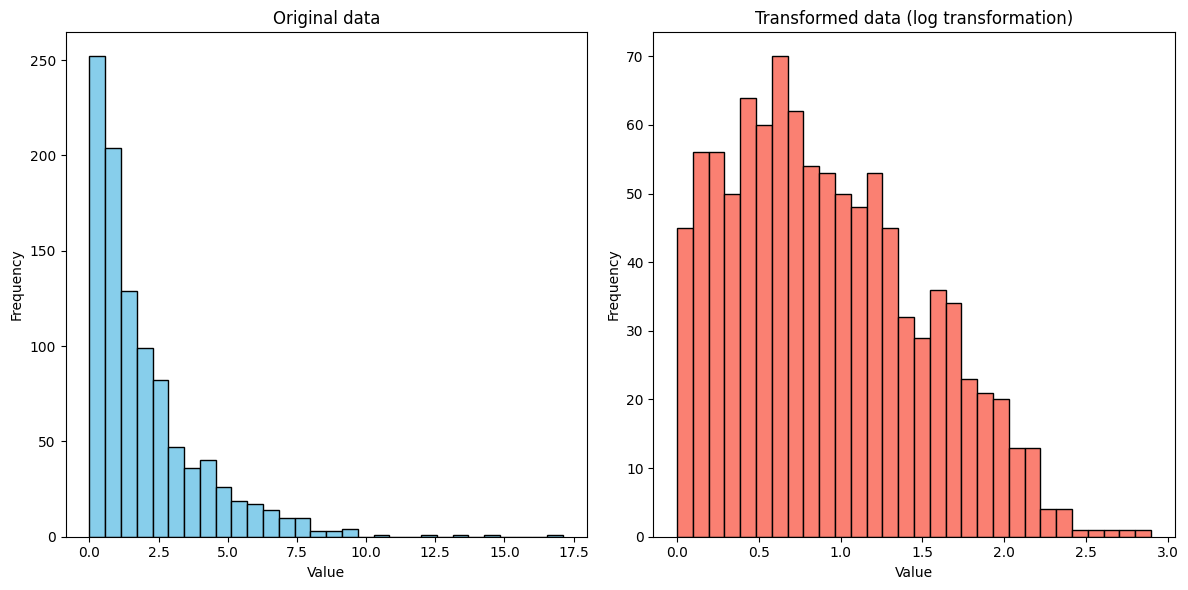

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data with exponential distribution
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)

# Visualize the source data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('Original data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Apply logarithmic transformation
# Add 1 to avoid logarithm of zero
data_transformed = np.log(data + 1)

# Visualize the transformed data
plt.subplot(1, 2, 2)
plt.hist(data_transformed, bins=30, color='salmon', edgecolor='black')
plt.title('Transformed data (log transformation)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Quantile Transformation

Quantile transformation is a data transformation method used to change the distribution of a variable so that it becomes more closely related to a normal distribution. This method is especially useful in machine learning problems when you want to improve the quality of a model by removing the influence of outliers and making the data more symmetric.

Quantile transformation works as follows:

1. The data is sorted.
2. Each value is assigned a quantile, which indicates what proportion of the data is less than or equal to this value.
2. The values ​​are then transformed according to a given distribution (e.g. normal).

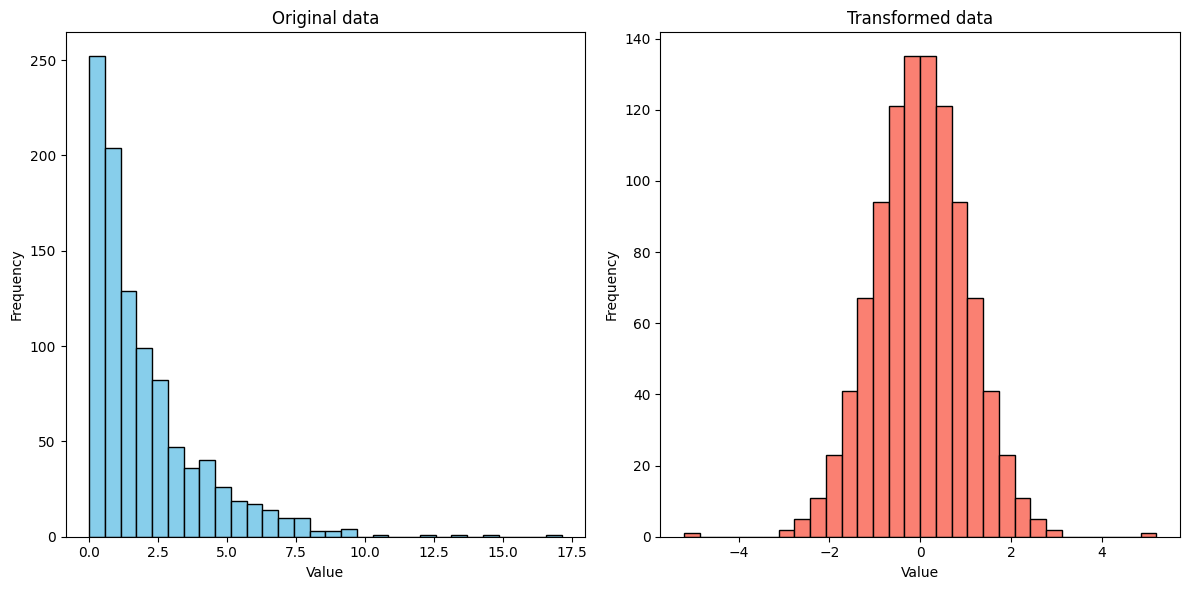

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

# Generate random data with asymmetric distribution
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)

# Visualize the source data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('Original data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Apply quantile transformation
quantile_transformer = QuantileTransformer(output_distribution='normal')
data_transformed = quantile_transformer.fit_transform(data.reshape(-1, 1))

# Visualize the transformed data
plt.subplot(1, 2, 2)
plt.hist(data_transformed, bins=30, color='salmon', edgecolor='black')
plt.title('Transformed data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Robust Scaling

#### Power transformation

Power transformation is a method used to transform data in order to improve its distribution, making it closer to normal. The two most common types of power transformation are Box-Cox and Yeo-Johnson.

#### Box-Cox Transformation Example

The Box-Cox transformation applies only to positive data. The formula for the Box-Cox transformation is:



$$y(λ) = \begin{cases}
\frac{y^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
\log(y), & \text{if } \lambda = 0
\end{cases} $$



where $y$ is the original value and λ is a parameter that is chosen to optimize the normality of the distribution.

### Yeo-Johnson Transformation Example

The Yeo-Johnson transformation is a generalization of the Box-Cox transformation and can be applied to data that contains zero or negative values. The formula for the Yeo-Johnson transformation is:

$$y(λ) = \begin{cases}
\frac{((y + 1)^\lambda - 1)}{\lambda}, & \text{if } y \geq 0 \text{ and } \lambda \neq 0 \\
\log(y + 1), & \text{if } y \geq 0 \text{ and } \lambda = 0 \\
-\frac{((-y + 1)^{2 - \lambda} - 1)}{2 - \lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2 \\
-\log(-y + 1), & \text{if } y < 0 \text{ and } \lambda = 2
\end{cases}
$$



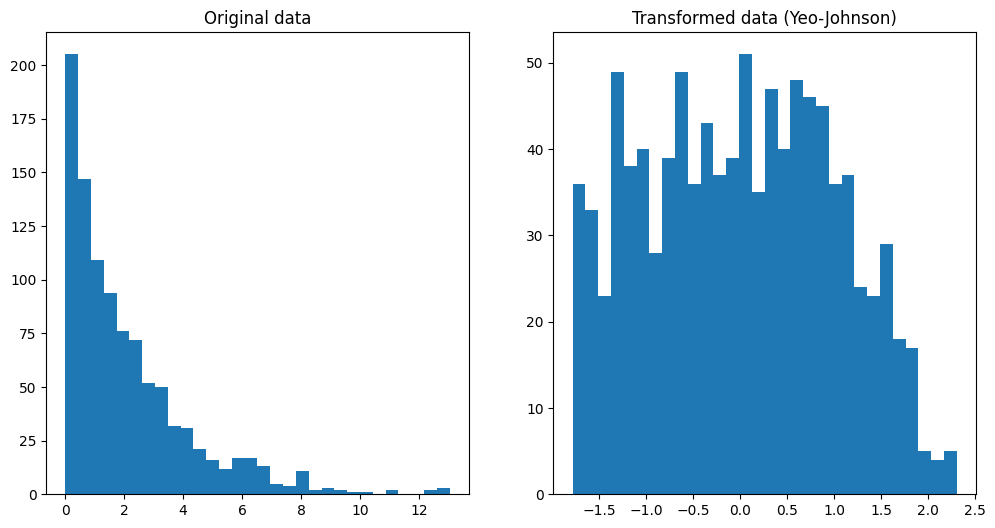

In [6]:
# An example of how to apply Yeo-Johnson transformation using the scikit-learn library
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Data generation
data = np.random.exponential(scale=2, size=1000)

# Visualization of source data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30)
plt.title('Original data')


# Application of Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
data_transformed = pt.fit_transform(data.reshape(-1, 1))

# Visualization of transformed data
plt.subplot(1, 2, 2)
plt.hist(data_transformed, bins=30)
plt.title('Transformed data (Yeo-Johnson)')

plt.show()
# In this example, we generate data with an exponential distribution, apply the Yeo-Johnson transformation, and visualize the results before and after the transformation.

## Principal Component Analysis

https://en.wikipedia.org/wiki/Principal_component_analysis

Principal Component Analysis (PCA) is one of the most popular dimensionality reduction techniques. It works as follows:

1. Data Standardization: If the original data has different scales, it needs to be standardized so that all features have the same weight.

2. Covariance Matrix Computation: For the standardized data, the covariance matrix is computed, which shows how the features are correlated with each other.

3. Eigenvectors and Eigenvalues Computation: The eigenvectors of the covariance matrix determine the directions of the principal components, and the eigenvalues indicate the proportion of variance in the data explained by each principal component.

4. Principal Component Selection: From all the eigenvectors, the k principal components corresponding to the k largest eigenvalues are selected. Typically, k is chosen such that at least 80-90% of the data variance is explained.

5. Data Projection onto Principal Components: The original data is projected onto the space formed by the selected k principal components. This allows reducing the dimensionality of the data while preserving the maximum amount of information.

Thus, PCA finds new, uncorrelated features (principal components) that explain the maximum proportion of variance in the original data. This makes the data more compact and convenient for further analysis.